# --- Pickle Pulse Generator ---

## Import libraries and configure board as a remote object

In [1]:
# Import libraries
%load_ext autoreload
%autoreload 2
from qick import *
import Pyro4
%pylab inline
from pickle_parser import *
from phase_calibration import *

# Pyro communicates with board
Pyro4.config.SERIALIZER = "pickle"
Pyro4.config.PICKLE_PROTOCOL_VERSION=4

# Static IP proxy
ns_host = "192.168.2.99"
ns_port = 8888
proxy_name = "myqick"

# QICK object
ns = Pyro4.locateNS(host=ns_host, port=ns_port)
soc = Pyro4.Proxy(ns.lookup(proxy_name))
soccfg = QickConfig(soc.get_cfg())
print(soccfg)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib

QICK configuration:

	Board: RFSoC4x2

	Software version: 0.2.267
	Firmware timestamp: Wed Sep  6 18:49:29 2023

	Global clocks (MHz): tProcessor 409.600, RF reference 491.520

	2 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 65536 samples (6.667 us)
		fs=9830.400 MHz, fabric=614.400 MHz, 32-bit DDS, range=9830.400 MHz
		DAC tile 0, blk 0 is DAC_B
	1:	axis_signal_gen_v6 - envelope memory 65536 samples (6.667 us)
		fs=9830.400 MHz, fabric=614.400 MHz, 32-bit DDS, range=9830.400 MHz
		DAC tile 2, blk 0 is DAC_A

	2 readout channels:
	0:	axis_readout_v2 - configured by PYNQ
		fs=4423.680 MHz, decimated=552.960 MHz, 32-bit DDS, range=4423.680 MHz
		maxlen 16384 accumulated, 1024 decimated (1.852 us)
		triggered by output 7, pin 14, feedback to tProc input 0
		ADC tile 0, blk 0 is ADC_D
	1:	axis_readout_v2 - configured by PYNQ


## Import pickle file containing sequences of pulses

In [2]:
# Import dictionary of sequences from pickle file
import pickle
with open('Sequence_ch1_ch2_mw.pickle', 'rb') as handle:
    imported_sequences = pickle.load(handle)

for key, value in imported_sequences.items():
    print(key, value)

ch1_Dig [(100.0, 0), (47000, 1), (100.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (1000.0, 0), (3000.0, 1), (100.0, 0)]
ch2_Dig [(100.0, 0), (47000, 1), (100.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (450.0, 0), (100.0, 1), (450.0, 0), (3000.0, 0), (100.0, 0)]
MW [(100.0, 0), (47000, 1, 0.05, 0)

## Parse pickle file and specify channel delays

In [3]:
# Gain and delay defaults are specified - not necessary to assign individually
# Multiplicative gain for DAC amplitudes
gains = {"DAC_A": 20000,
         "DAC_B": 20000
         }

# Channel trigger delays for synchronisation
delays = {"DAC_A": -38,
          "DAC_B": -38,
          "DIG_0": 0
          }

# Method 1: use if keys don't match channel names
ch_map={"DAC_A": "MW",
        "DAC_B": "MW",
        "DIG_0":"ch2_Dig",
        "DIG_1":"ch1_Dig"
        }

pulse_sequences = PickleParse(imported_sequences,
                              ch_map=ch_map,
                              gains=gains,
                              delays=delays
                              )

# Method 2: use if channel names already configured (uncomment block below)
# renamed_sequences = {}
# renamed_sequences["DAC_A"] = imported_sequences["MW"]
# renamed_sequences["DIG_0"] = imported_sequences["ch2_Dig"]
# renamed_sequences["DIG_1"] = imported_sequences["ch1_Dig"]

# pulse_sequences = PickleParse(renamed_sequences)

----- DAC A -----
ch_type: DAC
ch_index: 1
gain: 20000
delay: -38
lengths: [47.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
times: [0.1, 50.65, 54.65, 58.65, 62.65, 66.65, 70.65, 74.65, 78.65, 82.65, 86.65, 90.65]
amps: [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
freqs: [50.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
phases: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
num_pulses: 12
duration: 94.3
----- DAC B -----
ch_type: DAC
ch_index: 0
gain: 20000
delay: -38
lengths: [47.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
times: [0.1, 50.65, 54.65, 58.65, 62.65, 66.65, 70.65, 74.65, 78.65, 82.65, 86.65, 90.65]
amps: [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
freqs: [50.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]
phases: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
num_pulses: 12
duration: 94.3
----- DIG 0 ------
ch_type: DIG
ch_index: 0
gain: 10000
dela

## Calibrate DAC phase offsets

In [4]:
res = []
config = {"reps": 1}
dac_freqs = sorted(list(set(pulse_sequences.ch_cfg["DAC_A"]["freqs"] + pulse_sequences.ch_cfg["DAC_B"]["freqs"])))

for freq in dac_freqs:
    config['pulse_freq'] = freq
    prog = CalibratePhase(soccfg, config)
    data = prog.acquire_decimated(soc, progress=False)
    res.append([prog.calculate_phase(d) for d in data])
    soc.reset_gens()

# print(prog)
# print(data)

## Store and display phase offsets

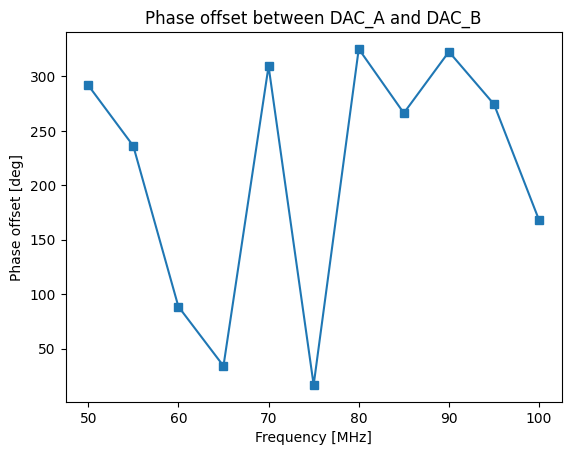

In [5]:
# FIXME: Don't like how this is relying on the order of the lists to work

delta_phis = {}

for i in range(len(dac_freqs)):
    delay = 360 * dac_freqs[i] * 35e-5
    delta_phis[dac_freqs[i]] = [((res[i][0][0] - res[i][1][0]) % 360) - delay, 0] 

x,y = [], []
for key, value in delta_phis.items():
    # print(f"{key}: {value[0]}")
    x.append(key)
    y.append(value[0])

plt.plot(x,y, marker="s")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Phase offset [deg]")
plt.title("Phase offset between DAC_A and DAC_B");

## Initialise program and load default parameters

In [6]:
# Create program object
prog = QickProgram(soccfg)

# Method 1 - Run, specifying number of repetitions
pulse_sequences.generate_asm(prog, delta_phis, reps=10)

# Method 2 - Run with no repetitions
# raman_cooling.generate_asm(prog, gain=10000)

## Run program and print QICK assembly

In [43]:
# Load assembly to board
prog.config_all(soc)

# Run program
soc.tproc.start() 

# Useful for debugging synchronisation issues
print(prog)


// Program

        synci 200;
        regwi 0, $14, 9;
LOOP_I: regwi 1, $22, 21845333;                 //freq = 21845333
        regwi 1, $23, 0;                        //phase = 0
        regwi 1, $25, 20000;                    //gain = 20000
        regwi 1, $26, 618701;                   //phrst| stdysel | mode | | outsel = 0b01001 | length = 28877 
        regwi 1, $27, 3;                        //t = 3
        set 1, 1, $22, $23, $0, $25, $26, $27;  //ch = 1, pulse @t = $27
        regwi 1, $22, 21845333;                 //freq = 21845333
        regwi 1, $23, 0;                        //phase = 0
        regwi 1, $25, 20000;                    //gain = 20000
        regwi 1, $26, 589885;                   //phrst| stdysel | mode | | outsel = 0b01001 | length = 61 
        regwi 1, $27, 20708;                    //t = 20708
        set 1, 1, $22, $23, $0, $25, $26, $27;  //ch = 1, pulse @t = $27
        regwi 1, $22, 24029867;                 //freq = 24029867
        regwi 1, $